In [1]:
import simfin as sf
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

In [2]:

# Set API Key 
sf.set_api_key('ZLj424KDiohtSc0u9bVaF7mIeIemoAir')

In [3]:
# Make Directory for Data 
sf.set_data_dir('~/simfin_data/')

In [4]:
# Load Ratios Data 
ratios_df = sf.load_derived(variant='quarterly-asreported', market='us')
print(ratios_df.head())

Dataset "us-derived-quarterly-asreported" on disk (4 days old).
- Loading from disk ... Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-

In [5]:
# Put Ratios Data in DataFrame
pd.DataFrame(ratios_df)

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   
...                      ...      ...          ...           ...          ...   
ZYXI   2020-09-30     171401      USD         2020            Q3   2020-10-27   
       2020-12-31     171401      USD         2020            Q4   2021-02-25   
       2021-03-31     171401      USD         2021            Q1   2021-04-29   
       2021-06-30     171401      USD         2021            Q2   2021-07-29   
       2021-09-30     171401      USD         2021            Q3   2021-11-02   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-05  274000000.0  2139000000      65000000.0   
       2011-04-30     2012-06-04  330000000.0  2144000000     393000000.0   
       2011-07-31     2012-09-05  344000000.0  2168000000      74000000.0   
...                          ...          ...         ...             ...   
ZYXI   2020-09-30     2020-10-27    1914000.0           0             NaN   
       2020-12-31     2021-02-25    2827000.0           0      -3070000.0   
       2021-03-31     2021-04-29    -594000.0           0      -6150000.0   
       2021-06-30     2021-07-29    4422000.0           0       1714000.0   
       2021-09-30     2021-11-02    8641000.0           0       6443000.0   

                    Gross Profit Margin  ...  Sales Per Share  \
Ticker Report Date                       ...                    
A      2010-07-31               0.52384  ...          3.98847   
       2010-10-31               0.52919  ...          4.58140   
       2011-01-31               0.53720  ...          4.37752   
       2011-04-30               0.53667  ...          4.83285   
       2011-07-31               0.52750  ...          4.85920   
...                                 ...  ...              ...   
ZYXI   2020-09-30               0.78548  ...          0.52791   
       2020-12-31               0.77899  ...          0.66900   
       2021-03-31               0.75604  ...          0.62961   
       2021-06-30               0.76575  ...          0.81016   
       2021-09-30               0.80346  ...          0.90956   

                    Equity Per Share  Free Cash Flow Per Share  \
Ticker Report Date                                               
A      2010-07-31            8.07493                   0.50144   
       2010-10-31            9.38372                   0.75000   
       2011-01-31            9.60231                   0.18732   
       2011-04-30           11.39193                   1.13256   
       2011-07-31           12.04598                   0.21264   
...                              ...                       ...   
ZYXI   2020-09-30            1.43170                       NaN   
       2020-12-31            1.48550                  -0.08021   
       2021-03-31            1.46534                  -0.16049   
       2021-06-30            1.49644                   0.04476   
       2021-09-30            1.65730                   0.16847   

                    Dividends Per Share  Piotroski F-Score  \
Ticker Report Date                                           
A      2010-07-31                   NaN                NaN   
       2010-10-31                   0.0                6.0   
       2011

In [6]:
# Reset ratios_df index 
ratios_df.reset_index(inplace=True)

# Filter for companies currently trading 
companies_dirty = ratios_df['Ticker'].to_list()

companies_clean = []
[companies_clean.append(x) for x in companies_dirty if x not in companies_clean]

char_list = ['_','1','ACPW', 'ADFK', 'ALTMS', 'ARTEC', 'AUDH', 'BCLR', 'BCSI', 'BLUD', 'C649', 'CCFI', 'CICC', 'CMBG', 'CYNX', 'DDMG', 'DGTC', 'DMDW', 'ELLI', 'EXDX', 'HOMR', 'INFOR', 'JCG', 'JDAS', 'LOXO', 'LTCH', 'MFE', 'NCSO', 'NDMT', 
             'NKT.CO', 'NOIZ', 'QVC', 'SCRH', 'SNGC', 'TM-28', 'TMB', 'VNTV', 'WLT', 'XING']
companies_clean = [ele for ele in companies_clean if all(ch not in ele for ch in char_list)]

# Rename date column and reindex, also drop bad columns 
ratios_df.rename(columns={'Publish Date':'Date'},inplace=True)
ratios_df.set_index(['Ticker', 'Date'], inplace=True)

ratios_df.drop(columns=['Free Cash Flow', 'EBITDA', 'Total Debt', 'SimFinId','Currency', 'Report Date','Restated Date'],inplace=True)
ratios_df.head()

Fiscal Year Fiscal Period  Gross Profit Margin  \
Ticker Date                                                         
A      2010-10-06         2010            Q3              0.52384   
       2010-12-20         2010            Q4              0.52919   
       2011-03-09         2011            Q1              0.53720   
       2011-06-07         2011            Q2              0.53667   
       2011-09-07         2011            Q3              0.52750   

                   Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Date                                                                
A      2010-10-06           0.08309            0.14812           0.07295   
       2010-12-20           0.12881            0.18528           0.09023   
       2011-03-09           0.13891            0.12706           0.05780   
       2011-06-07           0.15862            0.11926           0.05049   
       2011-09-07           0.16617            0.19515           0.07857   

                   Return on Assets  Free Cash Flow to Net Income  \
Ticker Date                                                         
A      2010-10-06           0.02253                       0.84878   
       2010-12-20           0.03012                       0.88356   
       2011-03-09           0.02399                       0.33679   
       2011-06-07           0.02312                       1.96500   
       2011-09-07           0.03770                       0.22424   

                   Current Ratio  Liabilities to Equity Ratio  ...  \
Ticker Date                                                    ...   
A      2010-10-06        1.96606                      2.23843  ...   
       2010-12-20        2.00097                      1.99629  ...   
       2011-03-09        3.27027                      1.40910  ...   
       2011-06-07        3.20101                      1.18354  ...   
       2011-09-07        3.47043                      1.08405  ...   

                   Sales Per Share  Equity Per Share  \
Ticker Date                                            
A      2010-10-06          3.98847           8.07493   
       2010-12-20          4.58140           9.38372   
       2011-03-09          4.37752           9.60231   
       2011-06-07          4.83285          11.39193   
       2011-09-07          4.85920          12.04598   

                   Free Cash Flow Per Share  Dividends Per Share  \
Ticker Date                                                        
A      2010-10-06                   0.50144                  NaN   
       2010-12-20                   0.75000                  0.0   
       2011-03-09                   0.18732                  NaN   
       2011-06-07                   1.13256                  0.0   
       2011-09-07                   0.21264                  0.0   

                   Piotroski F-Score  Return On Invested Capital  \
Ticker Date                                                        
A      2010-10-06                NaN                     0.02668   
       2010-12-20                6.0                     0.03599   
       2011-03-09                NaN                     0.02907   
       2011-06-07                NaN                     0.02834   
       2011-09-07                6.0                     0.04553   

                   Cash Return On Invested Capital  Dividend Payout Ratio  \
Ticker Date                                                                 
A      2010-10-06                          0.02264                    NaN   
       2010-12-20                          0.03180                    0.0   
       2011-03-09                          0.00979                    NaN   
       2011-06-07                          0.05569                    0.0   
       2011-09-07                          0.01021                    0.0   

                   Net Debt / EBITDA  Net Debt / EBIT  
Ticker Date                                            
A      2010-10-06           

In [7]:
# Load prices data 
prices_df = sf.load_shareprices(variant='daily', market='us')


Dataset "us-shareprices-daily" on disk (4 days old).
- Loading from disk ... Done!


In [8]:
# Drop all columns except 

prices_df.columns
prices_df.drop(columns=['Open', 'Low', 'High', 'Close', 'Dividend',
       'Volume', 'Shares Outstanding','SimFinId'], inplace=True)

In [9]:
# Create Daily Return Column 
prices_df['pct_change']=prices_df['Adj. Close'].pct_change().shift(-1)



In [10]:
# Visualize prices_df
prices_df.head()



Adj. Close  pct_change
Ticker Date                              
A      2007-01-03       22.60    0.003097
       2007-01-04       22.67   -0.009263
       2007-01-05       22.46   -0.003562
       2007-01-08       22.38    0.001340
       2007-01-09       22.41   -0.008925

In [11]:
# Visualize ratios_df
ratios_df.head()


Fiscal Year Fiscal Period  Gross Profit Margin  \
Ticker Date                                                         
A      2010-10-06         2010            Q3              0.52384   
       2010-12-20         2010            Q4              0.52919   
       2011-03-09         2011            Q1              0.53720   
       2011-06-07         2011            Q2              0.53667   
       2011-09-07         2011            Q3              0.52750   

                   Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Date                                                                
A      2010-10-06           0.08309            0.14812           0.07295   
       2010-12-20           0.12881            0.18528           0.09023   
       2011-03-09           0.13891            0.12706           0.05780   
       2011-06-07           0.15862            0.11926           0.05049   
       2011-09-07           0.16617            0.19515           0.07857   

                   Return on Assets  Free Cash Flow to Net Income  \
Ticker Date                                                         
A      2010-10-06           0.02253                       0.84878   
       2010-12-20           0.03012                       0.88356   
       2011-03-09           0.02399                       0.33679   
       2011-06-07           0.02312                       1.96500   
       2011-09-07           0.03770                       0.22424   

                   Current Ratio  Liabilities to Equity Ratio  ...  \
Ticker Date                                                    ...   
A      2010-10-06        1.96606                      2.23843  ...   
       2010-12-20        2.00097                      1.99629  ...   
       2011-03-09        3.27027                      1.40910  ...   
       2011-06-07        3.20101                      1.18354  ...   
       2011-09-07        3.47043                      1.08405  ...   

                   Sales Per Share  Equity Per Share  \
Ticker Date                                            
A      2010-10-06          3.98847           8.07493   
       2010-12-20          4.58140           9.38372   
       2011-03-09          4.37752           9.60231   
       2011-06-07          4.83285          11.39193   
       2011-09-07          4.85920          12.04598   

                   Free Cash Flow Per Share  Dividends Per Share  \
Ticker Date                                                        
A      2010-10-06                   0.50144                  NaN   
       2010-12-20                   0.75000                  0.0   
       2011-03-09                   0.18732                  NaN   
       2011-06-07                   1.13256                  0.0   
       2011-09-07                   0.21264                  0.0   

                   Piotroski F-Score  Return On Invested Capital  \
Ticker Date                                                        
A      2010-10-06                NaN                     0.02668   
       2010-12-20                6.0                     0.03599   
       2011-03-09                NaN                     0.02907   
       2011-06-07                NaN                     0.02834   
       2011-09-07                6.0                     0.04553   

                   Cash Return On Invested Capital  Dividend Payout Ratio  \
Ticker Date                                                                 
A      2010-10-06                          0.02264                    NaN   
       2010-12-20                          0.03180                    0.0   
       2011-03-09                          0.00979                    NaN   
       2011-06-07                          0.05569                    0.0   
       2011-09-07                          0.01021                    0.0   

                   Net Debt / EBITDA  Net Debt / EBIT  
Ticker Date                                            
A      2010-10-06           

In [12]:
# Combiner function can combine ratio_df with prices_df 

def combiner(ticker):
    ticker_ratio = ratios_df.loc[ticker,:]
    ticker_prices = prices_df.loc[ticker,:]
    tickers = pd.merge(ticker_ratio, ticker_prices,left_index=True, right_index=True,how='inner')
   
    return tickers
    

    

In [13]:
# Visualize list of companies currently trading 
companies_clean


['A',
 'AA',
 'AAL',
 'AAMC',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAWW',
 'ABAX',
 'ABBV',
 'ABC',
 'ABCD',
 'ABCL',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMC',
 'ABMD',
 'ABNB',
 'ABSI',
 'ABT',
 'ABTL',
 'ABUS',
 'AC',
 'ACA',
 'ACAD',
 'ACAN',
 'ACAT',
 'ACCO',
 'ACER',
 'ACET',
 'ACHC',
 'ACI',
 'ACIA',
 'ACIW',
 'ACLS',
 'ACM',
 'ACN',
 'ACRX',
 'ACT',
 'ACU',
 'ACW',
 'ACY',
 'ADBE',
 'ADES',
 'ADI',
 'ADIL',
 'ADM',
 'ADMA',
 'ADNT',
 'ADOM',
 'ADP',
 'ADPT',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADV',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEO',
 'AEP',
 'AEPI',
 'AES',
 'AFI',
 'AFRM',
 'AGCO',
 'AGI',
 'AGIO',
 'AGLE',
 'AGN',
 'AGNC',
 'AGR',
 'AGS',
 'AGX',
 'AGYS',
 'AHPI',
 'AIMC',
 'AIR',
 'AIRI',
 'AIT',
 'AJG',
 'AJRD',
 'AKAM',
 'AKR',
 'AKRX',
 'AKS',
 'AKYA',
 'AL',
 'ALB',
 'ALCO',
 'ALE',
 'ALG',
 'ALGN',
 'ALGT',
 'ALJ',
 'ALJJ',
 'ALK',
 'ALKS',
 'ALLE',
 'ALNY',
 'ALOT',
 'ALPN',
 'ALR',
 'ALRM',
 'ALRN',
 'ALSK',
 'ALSN',
 'ALT',
 

In [14]:
# Pass the 'cleaned' list of company tickers through combiner 
all_df = combiner(companies_clean)

all_df.head()

Fiscal Year Fiscal Period  Gross Profit Margin  \
Ticker Date                                                         
A      2010-10-06         2010            Q3              0.52384   
       2010-12-20         2010            Q4              0.52919   
       2011-03-09         2011            Q1              0.53720   
       2011-06-07         2011            Q2              0.53667   
       2011-09-07         2011            Q3              0.52750   

                   Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Date                                                                
A      2010-10-06           0.08309            0.14812           0.07295   
       2010-12-20           0.12881            0.18528           0.09023   
       2011-03-09           0.13891            0.12706           0.05780   
       2011-06-07           0.15862            0.11926           0.05049   
       2011-09-07           0.16617            0.19515           0.07857   

                   Return on Assets  Free Cash Flow to Net Income  \
Ticker Date                                                         
A      2010-10-06           0.02253                       0.84878   
       2010-12-20           0.03012                       0.88356   
       2011-03-09           0.02399                       0.33679   
       2011-06-07           0.02312                       1.96500   
       2011-09-07           0.03770                       0.22424   

                   Current Ratio  Liabilities to Equity Ratio  ...  \
Ticker Date                                                    ...   
A      2010-10-06        1.96606                      2.23843  ...   
       2010-12-20        2.00097                      1.99629  ...   
       2011-03-09        3.27027                      1.40910  ...   
       2011-06-07        3.20101                      1.18354  ...   
       2011-09-07        3.47043                      1.08405  ...   

                   Free Cash Flow Per Share  Dividends Per Share  \
Ticker Date                                                        
A      2010-10-06                   0.50144                  NaN   
       2010-12-20                   0.75000                  0.0   
       2011-03-09                   0.18732                  NaN   
       2011-06-07                   1.13256                  0.0   
       2011-09-07                   0.21264                  0.0   

                   Piotroski F-Score  Return On Invested Capital  \
Ticker Date                                                        
A      2010-10-06                NaN                     0.02668   
       2010-12-20                6.0                     0.03599   
       2011-03-09                NaN                     0.02907   
       2011-06-07                NaN                     0.02834   
       2011-09-07                6.0                     0.04553   

                   Cash Return On Invested Capital  Dividend Payout Ratio  \
Ticker Date                                                                 
A      2010-10-06                          0.02264                    NaN   
       2010-12-20                          0.03180                    0.0   
       2011-03-09                          0.00979                    NaN   
       2011-06-07                          0.05569                    0.0   
       2011-09-07                          0.01021                    0.0   

                   Net Debt / EBITDA  Net Debt / EBIT  Adj. Close  pct_change  
Ticker Date                                                                    
A      2010-10-06            7.77714         11.83478       21.53    0.016256  
       2010-12-20            3.85926          5.13300       26.77    0.004856  
       2011-03-09           -1.82117         -2.36493       30.34   -0.025379  
       2011-06-07           -2.51818         -3.12406       31.43    0.000955  
       2011-09-07           -2.71221         -3.32028

In [15]:
#all_df.drop(columns=['Fiscal Year','Fiscal Period','SimFinId','Adj. Close','Dividends Per Share', 'Dividend Payout Ratio'],inplace=True)

# Make positive return into '1' and negative return into '0' 

all_df['pct_change'][all_df['pct_change'] < 0] = 0
all_df['pct_change'][all_df['pct_change'] > 0] = 1
all_df.head()

/var/folders/ql/7cpmkpc96jq83bztknmmyg880000gn/T/ipykernel_47363/531027856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['pct_change'][all_df['pct_change'] < 0] = 0
/var/folders/ql/7cpmkpc96jq83bztknmmyg880000gn/T/ipykernel_47363/531027856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['pct_change'][all_df['pct_change'] > 0] = 1


Fiscal Year Fiscal Period  Gross Profit Margin  \
Ticker Date                                                         
A      2010-10-06         2010            Q3              0.52384   
       2010-12-20         2010            Q4              0.52919   
       2011-03-09         2011            Q1              0.53720   
       2011-06-07         2011            Q2              0.53667   
       2011-09-07         2011            Q3              0.52750   

                   Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Date                                                                
A      2010-10-06           0.08309            0.14812           0.07295   
       2010-12-20           0.12881            0.18528           0.09023   
       2011-03-09           0.13891            0.12706           0.05780   
       2011-06-07           0.15862            0.11926           0.05049   
       2011-09-07           0.16617            0.19515           0.07857   

                   Return on Assets  Free Cash Flow to Net Income  \
Ticker Date                                                         
A      2010-10-06           0.02253                       0.84878   
       2010-12-20           0.03012                       0.88356   
       2011-03-09           0.02399                       0.33679   
       2011-06-07           0.02312                       1.96500   
       2011-09-07           0.03770                       0.22424   

                   Current Ratio  Liabilities to Equity Ratio  ...  \
Ticker Date                                                    ...   
A      2010-10-06        1.96606                      2.23843  ...   
       2010-12-20        2.00097                      1.99629  ...   
       2011-03-09        3.27027                      1.40910  ...   
       2011-06-07        3.20101                      1.18354  ...   
       2011-09-07        3.47043                      1.08405  ...   

                   Free Cash Flow Per Share  Dividends Per Share  \
Ticker Date                                                        
A      2010-10-06                   0.50144                  NaN   
       2010-12-20                   0.75000                  0.0   
       2011-03-09                   0.18732                  NaN   
       2011-06-07                   1.13256                  0.0   
       2011-09-07                   0.21264                  0.0   

                   Piotroski F-Score  Return On Invested Capital  \
Ticker Date                                                        
A      2010-10-06                NaN                     0.02668   
       2010-12-20                6.0                     0.03599   
       2011-03-09                NaN                     0.02907   
       2011-06-07                NaN                     0.02834   
       2011-09-07                6.0                     0.04553   

                   Cash Return On Invested Capital  Dividend Payout Ratio  \
Ticker Date                                                                 
A      2010-10-06                          0.02264                    NaN   
       2010-12-20                          0.03180                    0.0   
       2011-03-09                          0.00979                    NaN   
       2011-06-07                          0.05569                    0.0   
       2011-09-07                          0.01021                    0.0   

                   Net Debt / EBITDA  Net Debt / EBIT  Adj. Close  pct_change  
Ticker Date                                                                    
A      2010-10-06            7.77714         11.83478       21.53         1.0  
       2010-12-20            3.85926          5.13300       26.77         1.0  
       2011-03-09           -1.82117         -2.36493       30.34         0.0  
       2011-06-07           -2.51818         -3.12406       31.43         1.0  
       2011-09-07           -2.71221         -3.32028

In [16]:
all_df.reset_index(drop=True, inplace=True)
all_df.drop(columns=['Fiscal Year', 'Fiscal Period', 'Adj. Close', 'Dividends Per Share', 'Piotroski F-Score','Dividend Payout Ratio'],inplace=True)

all_df.head()

,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,pct_change
0,0.52384,0.08309,0.14812,0.07295,0.02253,0.84878,1.96606,2.23843,0.40418,0.59078,0.58239,3.98847,8.07493,0.50144,0.02668,0.02264,7.77714,11.83478,1.0
1,0.52919,0.12881,0.18528,0.09023,0.03012,0.88356,2.00097,1.99629,0.38067,0.84884,0.82022,4.58140,9.38372,0.75000,0.03599,0.03180,3.85926,5.13300,1.0
2,0.53720,0.13891,0.12706,0.05780,0.02399,0.33679,3.27027,1.40910,0.26591,0.55620,0.54366,4.37752,9.60231,0.18732,0.02907,0.00979,-1.82117,-2.36493,0.0
3,0.53667,0.15862,0.11926,0.05049,0.02312,1.96500,3.20101,1.18354,0.24789,0.57637,0.56338,4.83285,11.39193,1.13256,0.02834,0.05569,-2.51818,-3.12406,1.0
4,0.52750,0.16617,0.19515,0.07857,0.03770,0.22424,3.47043,1.08405,0.24769,0.94828,0.92437,4.85920,12.04598,0.21264,0.04553,0.01021,-2.71221,-3.32028,0.0


In [17]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [18]:
all_df = clean_dataset(all_df)
all_df.head()

,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,pct_change
0,0.52384,0.08309,0.14812,0.07295,0.02253,0.84878,1.96606,2.23843,0.40418,0.59078,0.58239,3.98847,8.07493,0.50144,0.02668,0.02264,7.77714,11.83478,1.0
1,0.52919,0.12881,0.18528,0.09023,0.03012,0.88356,2.00097,1.99629,0.38067,0.84884,0.82022,4.58140,9.38372,0.75000,0.03599,0.03180,3.85926,5.13300,1.0
2,0.53720,0.13891,0.12706,0.05780,0.02399,0.33679,3.27027,1.40910,0.26591,0.55620,0.54366,4.37752,9.60231,0.18732,0.02907,0.00979,-1.82117,-2.36493,0.0
3,0.53667,0.15862,0.11926,0.05049,0.02312,1.96500,3.20101,1.18354,0.24789,0.57637,0.56338,4.83285,11.39193,1.13256,0.02834,0.05569,-2.51818,-3.12406,1.0
4,0.52750,0.16617,0.19515,0.07857,0.03770,0.22424,3.47043,1.08405,0.24769,0.94828,0.92437,4.85920,12.04598,0.21264,0.04553,0.01021,-2.71221,-3.32028,0.0


In [19]:
# Prepare Train and Test 
X = all_df.copy()
X.drop("pct_change", axis=1, inplace=True)
X.head()


y = all_df['pct_change']
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# See if there is a class imbalance 
Counter(y_train) 

Counter({0.0: 24627, 1.0: 24066})

In [20]:
# Scale data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [21]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0
    )

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (train): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (test): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (train): 0.547
Accuracy score (test): 0.535

Learning rate:  0.1
Accuracy score (train): 0.553
Accuracy score (test): 0.536

Learning rate:  0.25
Accuracy score (train): 0.569
Accuracy score (test): 0.535

Learning rate:  0.5
Accuracy score (train): 0.580
Accuracy score (test): 0.534

Learning rate:  0.75
Accuracy score (train): 0.593
Accuracy score (test): 0.529

Learning rate:  1
Accuracy score (train): 0.596
Accuracy score (test): 0.521



In [22]:
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_features=2,
    max_depth=3,
    random_state=0
)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,1.0
5,1.0,1.0
6,0.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


In [23]:
# Generate confusino matrix 
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4290,3866
Actual 1,3663,4412


Accuracy Score : 0.5361345573285687
Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.53      8156
         1.0       0.53      0.55      0.54      8075

    accuracy                           0.54     16231
   macro avg       0.54      0.54      0.54     16231
weighted avg       0.54      0.54      0.54     16231



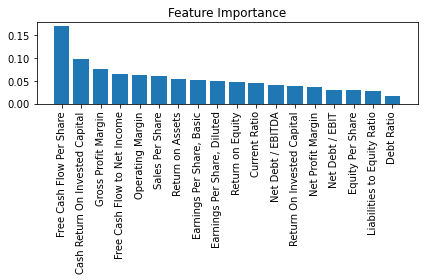

In [27]:
# Determine feature importance 
importances = classifier.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt

# Display Feature Importance 
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.savefig('gb_feature_importances')
plt.show()
